<a href="https://colab.research.google.com/github/INCREDIBLE-AURNOB/Criptocurrency-Market-Value/blob/main/criptocurrency_Market_values_and_supply.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
!pip3 install opendatasets --quiet

In [63]:

import opendatasets as od

In [64]:
dataset="https://www.kaggle.com/datasets/thedevastator/cryptocurrency-market-values-and-supply"

In [65]:
data=od.download(dataset)

Skipping, found downloaded files in "./cryptocurrency-market-values-and-supply" (use force=True to force download)


In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
raw_df=pd.read_csv("/content/cryptocurrency-market-values-and-supply/top cryto2.csv")

In [68]:
raw_df

,Unnamed: 0,Name,Market_cap,price,circulating_supply,symbol,Date
0,0,Bitcoin,3.852083e+11,20127.14,"19,138,750",BTC,01 September 2022
1,1,Ethereum,1.938345e+11,1586.18,"122,202,301",ETH,01 September 2022
2,2,Tether,6.755111e+10,1.00,"67,550,404,113",USDT,01 September 2022
3,3,USD Coin,5.202630e+10,1.00,"52,027,528,034",USDC,01 September 2022
4,4,BNB,4.491907e+10,278.42,"161,337,261",BNB,01 September 2022
...,...,...,...,...,...,...,...
595,595,Avalanche,5.089442e+09,17.20,"295,963,244",AVAX,30 September 2022
596,596,Uniswap,4.916393e+09,6.45,"762,209,327",UNI,30 September 2022
597,597,Wrapped Bitcoin,4.756996e+09,19427.69,"244,856",WBTC,30 September 2022
598,598,UNUS SED LEO,3.996808e+09,4.19,"953,954,130",LEO,30 September 2022


Analysing the data

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


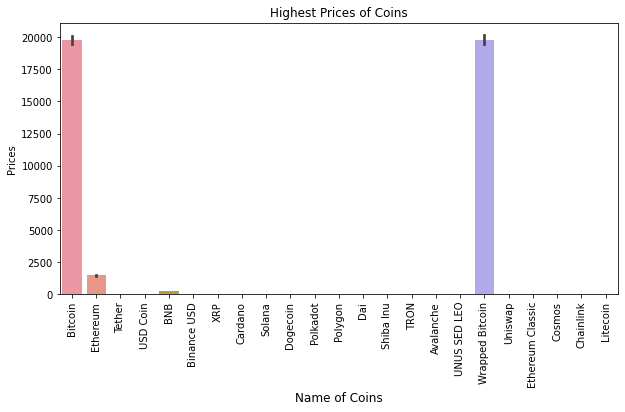

In [69]:
plt.figure(figsize=(10,5))
sns.barplot(raw_df['Name'], raw_df['price'].values)
plt.title('Highest Prices of Coins')
plt.ylabel('Prices')
plt.xlabel('Name of Coins', fontsize=12)
plt.xticks(rotation=90)
plt.show()

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


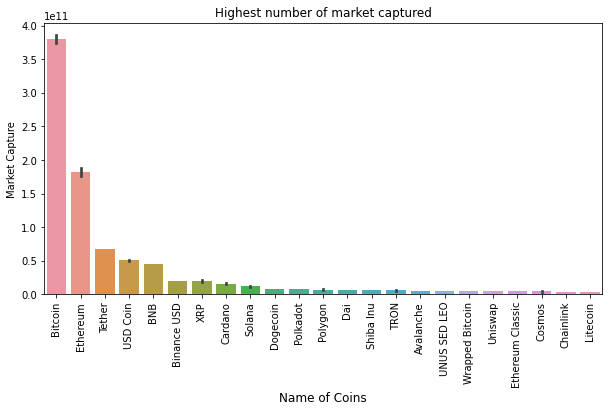

In [70]:
plt.figure(figsize=(10,5))
sns.barplot(raw_df['Name'], raw_df['Market_cap'].values)
plt.title('Highest number of market captured')
plt.ylabel('Market Capture')
plt.xlabel('Name of Coins', fontsize=12)
plt.xticks(rotation=90)
plt.show()

## Preprocessing the data

In [71]:
raw_df['Date']=pd.to_datetime(raw_df['Date'])
raw_df['Date'] = raw_df['Date'].dt.strftime('%d/%m/%Y')


In [72]:
raw_df["Day"]=pd.to_datetime(raw_df.Date,format="%d/%m/%Y").dt.day
raw_df["Month"]=pd.to_datetime(raw_df.Date,format="%d/%m/%Y").dt.month
raw_df["Year"]=pd.to_datetime(raw_df.Date,format="%d/%m/%Y").dt.year

In [73]:
raw_df.head()

,Unnamed: 0,Name,Market_cap,price,circulating_supply,symbol,Date,Day,Month,Year
0,0,Bitcoin,3.852083e+11,20127.14,"19,138,750",BTC,01/09/2022,1,9,2022
1,1,Ethereum,1.938345e+11,1586.18,"122,202,301",ETH,01/09/2022,1,9,2022
2,2,Tether,6.755111e+10,1.00,"67,550,404,113",USDT,01/09/2022,1,9,2022
3,3,USD Coin,5.202630e+10,1.00,"52,027,528,034",USDC,01/09/2022,1,9,2022
4,4,BNB,4.491907e+10,278.42,"161,337,261",BNB,01/09/2022,1,9,2022


/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


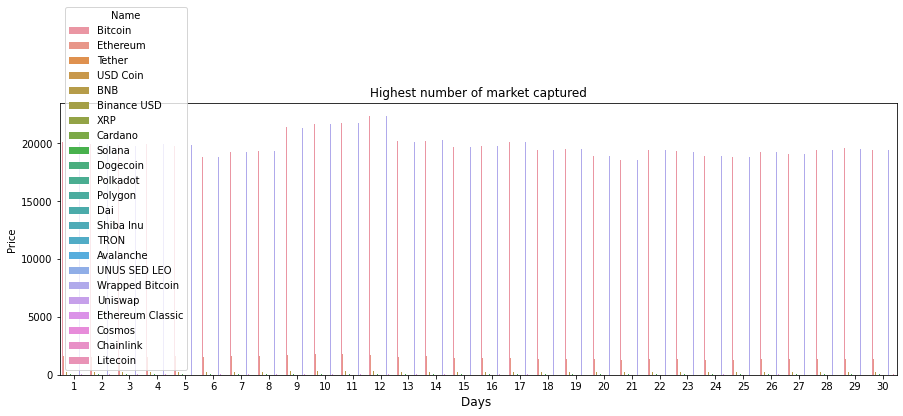

In [74]:
plt.figure(figsize=(15,5))
sns.barplot(raw_df['Day'],raw_df['price'],hue=raw_df['Name'])
plt.title('Highest number of market captured')
plt.ylabel('Price')
plt.xlabel('Days ', fontsize=12)
plt.show()

In [75]:
format_number = lambda x: '{:.2f}'.format(float(x))
raw_df['Market_cap']=raw_df['Market_cap'].apply(format_number)
raw_df['price']=raw_df['price'].apply(format_number)

In [76]:
raw_df['circulating_supply'] = raw_df['circulating_supply'].str.replace(',', '')

In [77]:
raw_df=raw_df.drop(['Unnamed: 0','symbol','Date','Month','Year'],axis=1)

In [78]:

raw_df.head()

,Name,Market_cap,price,circulating_supply,Day
0,Bitcoin,385208305831.57,20127.14,19138750,1
1,Ethereum,193834454491.69,1586.18,122202301,1
2,Tether,67551112128.60,1.00,67550404113,1
3,USD Coin,52026303625.37,1.00,52027528034,1
4,BNB,44919072541.51,278.42,161337261,1


In [79]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
raw_df['Name'] = le.fit_transform(raw_df['Name'])
raw_df['Name']

0       3
1       9
2      17
3      19
4       1
       ..
595     0
596    20
597    21
598    18
599    11
Name: Name, Length: 600, dtype: int64

In [80]:
raw_df

,Name,Market_cap,price,circulating_supply,Day
0,3,385208305831.57,20127.14,19138750,1
1,9,193834454491.69,1586.18,122202301,1
2,17,67551112128.60,1.00,67550404113,1
3,19,52026303625.37,1.00,52027528034,1
4,1,44919072541.51,278.42,161337261,1
...,...,...,...,...,...
595,0,5089442227.99,17.20,295963244,30
596,20,4916393296.37,6.45,762209327,30
597,21,4756996442.68,19427.69,244856,30
598,18,3996808452.13,4.19,953954130,30


In [81]:
raw_df['Name'].unique()

array([ 3,  9, 17, 19,  1,  2, 22,  4, 15,  8, 12, 13,  7, 14, 16,  0, 18,
       21, 20, 10,  6,  5, 11])

## Checking the correlation

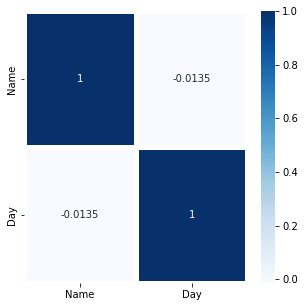

In [82]:
plt.figure(figsize=(5,5))
sns.heatmap(raw_df.corr(),annot=True, fmt='.3g',linewidths=5, cmap='Blues')
plt.show()


#### We can see that the positive and negative co-relation is very low among the features . So we dont need to select the features.

## Spliting the data 

In [83]:
x=raw_df.drop("price",axis=1)
y=raw_df['price']

In [84]:
x.shape,y.shape

((600, 4), (600,))

In [85]:

from sklearn.model_selection import train_test_split

In [86]:

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [87]:
x_train.shape ,y_train.shape

((480, 4), (480,))

In [88]:
x_test.shape,y_test.shape

((120, 4), (120,))

In [89]:
x_train

,Name,Market_cap,circulating_supply,Day
145,2,19912266463.02,19914503967,8
9,8,8274909579.98,132670764300,1
375,0,5117881890.11,295750682,19
523,19,49212281314.40,49206247660,27
188,15,12403867342.36,353117653,10
...,...,...,...,...
71,13,7763819651.46,8682124704,4
106,22,15996480398.32,49646492379,6
270,12,8046879731.73,1117131532,14
435,0,5234078388.68,295863660,22


In [92]:

from sklearn.linear_model import LogisticRegression
lr=LogisticRegression().fit(x_train,y_train)
y_pred=lr.predict(x_test)
pd.DataFrame(np.c_[y_test, y_pred, y_test], columns=['Actual', 'Predicted', 'y-test'])



/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Actual,Predicted,y-test
0,6.88,0.00,6.88
1,13.46,0.00,13.46
2,0.49,0.00,0.49
3,19961.09,0.00,19961.09
4,1776.20,0.00,1776.20
...,...,...,...
115,13.93,0.00,13.93
116,19419.51,0.00,19419.51
117,33.61,0.00,33.61
118,0.06,0.00,0.06


In [93]:
y_pred

array(['0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00',
       '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00',
       '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00',
       '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00',
       '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00',
       '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00',
       '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00',
       '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00',
       '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00',
       '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00',
       '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00',
       '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00',
       '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00',
       '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00',
      